<a href="https://colab.research.google.com/github/RahulVijaySingh/cats-v-dogs-classification/blob/project/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 182MB/s]
100% 1.06G/1.06G [00:06<00:00, 174MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [7]:
# generators -- divide the large data in the batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
  )

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [17]:
# create CNN

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.4399 - accuracy: 0.5862 - val_loss: 0.6172 - val_accuracy: 0.6570
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5676 - accuracy: 0.7154 - val_loss: 0.5701 - val_accuracy: 0.7022
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4831 - accuracy: 0.7707 - val_loss: 0.5625 - val_accuracy: 0.7062
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4122 - accuracy: 0.8159 - val_loss: 0.4516 - val_accuracy: 0.7894
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3798 - accuracy: 0.8342 - val_loss: 0.4469 - val_accuracy: 0.7986
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2911 - accuracy: 0.8761 - val_loss: 0.7202 - val_accuracy: 0.7524
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2209 - accuracy: 0.9093 - val_loss: 0.5715 - val_ac

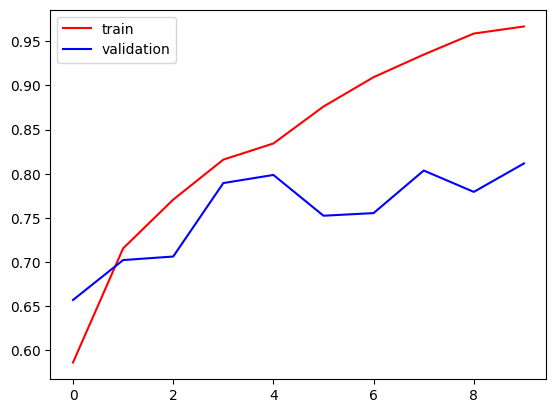

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

#  way to reduce overfitting

# Data more data
# L1/l2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [38]:
import cv2

In [90]:
test_img=cv2.imread('/content/cat.jpg')

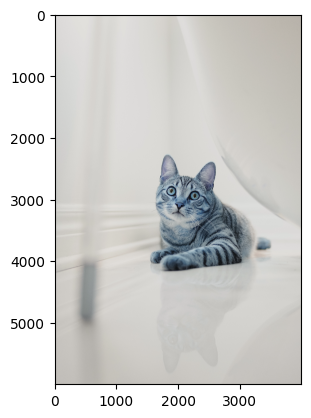

In [91]:
plt.imshow(test_img)

In [92]:
test_img.shape

(6000, 4000, 3)

In [93]:
test_img= cv2.resize(test_img,(256,256))

In [94]:
test_input=test_img.reshape((1,256,256,3))

In [95]:
# cat
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)